# Load Modules

In [5]:
import numpy as np
import pandas as pd
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.sans-serif'] = 'Arial'
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
%matplotlib inline

In [4]:
def load_data(file_pairs,src_dir='',dst_dir='.'):
    import os
    if not os.path.isdir(dst_dir):
        os.mkdir(dst_dir)
    for file_pair in file_pairs:
        src = os.path.abspath(os.path.expanduser(os.path.join(src_dir,file_pair[0])))
        dst = os.path.expanduser(os.path.join(dst_dir,file_pair[1]))
        if os.path.isfile(dst):
            os.remove(dst)
        if not os.path.islink(dst):
            os.symlink(src,dst)

def load_data_suffixes(file_pairs, src_dir='', dst_dir='.', suffixes=None):
    import os
    if not os.path.isdir(dst_dir):
        os.mkdir(dst_dir)
    if not suffixes:
        for file_pair in file_pairs:
            src = os.path.abspath(os.path.expanduser(os.path.join(src_dir, file_pair[0])))
            dst = os.path.expanduser(os.path.join(dst_dir, file_pair[1]))
            if os.path.isfile(dst):
                os.remove(dst)
            if not os.path.islink(dst):
                os.symlink(src, dst)
    else:
        for file_pair in file_pairs:
            for suffix_pair in suffixes:
                src = os.path.abspath(os.path.expanduser(
                    os.path.join(src_dir, file_pair[0] + suffix_pair[0])))
                dst = os.path.expanduser(
                    os.path.join(dst_dir, file_pair[1] + suffix_pair[1]))
                if os.path.isfile(dst):
                    os.remove(dst)
                if not os.path.islink(dst):
                    os.symlink(src, dst)

In [2]:
import os
os.chdir('/mnt/Storage/home/wangyiman/fitCUTRUN/revision_1/analysis/cell_viability_FACS/')

# bar plot -- Fig.S1B

In [6]:
FACS_results = pd.read_csv('FACS_results.csv', header = 0, sep = '\t')
FACS_results

,replicates,WT,PBS,ATF1-Fc,ATF1-flag,ELF1-Fc,ELF1-flag
0,rep1,0.9202,0.8809,0.8667,0.8720,0.8324,0.8332
1,rep2,0.9056,0.8790,0.8384,0.8388,0.8085,0.8264
2,rep3,0.8806,0.8733,0.8052,0.8055,0.7698,0.7816


In [7]:
FACS_results = FACS_results.melt(id_vars=["replicates"])
FACS_results

,replicates,variable,value
0,rep1,WT,0.9202
1,rep2,WT,0.9056
2,rep3,WT,0.8806
3,rep1,PBS,0.8809
4,rep2,PBS,0.8790
5,rep3,PBS,0.8733
6,rep1,ATF1-Fc,0.8667
7,rep2,ATF1-Fc,0.8384
8,rep3,ATF1-Fc,0.8052
9,rep1,ATF1-flag,0.8720


In [8]:
FACS_results['variable'].unique()

array(['WT', 'PBS', 'ATF1-Fc', 'ATF1-flag', 'ELF1-Fc', 'ELF1-flag'],
      dtype=object)

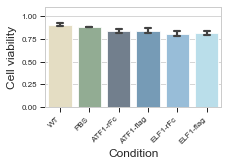

In [23]:
with sns.axes_style('whitegrid', rc={
        'xtick.bottom': True,
        'ytick.left': True
}), sns.plotting_context('paper',
                         rc={
                             'axes.titlesize': 14,
                             'axes.labelsize': 12,
                             'xtick.labelsize': 8,
                             'ytick.labelsize': 8,
                             'legend.fontsize': 8
                         }):
    fig, ax = plt.subplots(figsize=(6.4 * .5, 4.8 *.5))
    sns.barplot(
        x='variable',
        y='value',
        data=FACS_results,
        palette=['#E4DDC3', '#92AC93', '#727F8D', '#769BB6', '#98BDD8', '#BADEEA'],
        ci='sd',
        saturation=1,
        capsize=.2,
        ax=ax,
    )
    ax.set_xticklabels(labels=['WT', 'PBS', 'ATF1-rFc', 'ATF1-flag', 'ELF1-rFc', 'ELF1-flag'],
                       rotation=45, ha = 'right')
    ax.set_ylabel('Cell viability')
    ax.set_xlabel('Condition')
    ax.set_ylim(0, 1.10)
    fig.tight_layout()
    fig.savefig('/mnt/Storage/home/wangyiman/fitCUTRUN/revision_1/analysis/figures/Supple_Fig1B_barplot_cellViability_FACS.pdf', transparent=True)

In [24]:
FACS_results.groupby('variable').mean()

,value
variable,
ATF1-Fc,0.836767
ATF1-flag,0.838767
ELF1-Fc,0.803567
ELF1-flag,0.813733
PBS,0.877733
WT,0.902133
